<a href="https://colab.research.google.com/github/flcam/Portfolio-analise-dados/blob/main/An%C3%A1lise_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import sklearn

### Versões das bibliotecas

In [ ]:
print(f'Versão do pandas:{pd.__version__}')
print(f'Versão do numpy:{np.__version__}')
print(f'Versão do sklearn:{sklearn.__version__}')

Versão do pandas:2.2.2
Versão do numpy:1.26.4
Versão do sklearn:1.6.1


### Leitura e armazenamento dos dados do arquivo CSV

In [ ]:
df = pd.read_csv('/content/alzheimers_prediction_dataset.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


### Verifica se há algum valor nulo em qualquer coluna do DataFrame

In [ ]:
df.isnull().any().any()

False

### Shape - Retorna as dimensões de um DataFrame, ou seja, a quantidade de linhas e colunas que ele possui

In [ ]:
df.shape

(74283, 25)

### Drop - Exclusão de colunas contendo dados não relevantes para a análise em questão

In [ ]:
exclui_dados = df.drop(columns=['Education Level', 'Air Pollution Exposure', 'Social Engagement Level', 'Sleep Quality', 'Marital Status', 'Diabetes','Employment Status', 'Cognitive Test Score', 'Income Level'])
df = exclui_dados
df.head()

,Country,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,Dietary Habits,Genetic Risk Factor (APOE-ε4 allele),Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No


### Rename - Renomeando os nomes das colunas

In [ ]:
df.rename(columns={"Country": "Pais", "Age": "Idade", "Education Level": "Nivel Escolaridade", "BMI": "IMC","Physical Activity Level": "Nivel Atividade Fisica", "Family History of Alzheimer’s": "Historico Familiar de Alzheimer", "Marital Status": "Estado Civil", "Gender": "Gênero", "Genetic Risk Factor (APOE-ε4 allele)": "Risco Genetico", "Alzheimer’s Diagnosis": "Diagnosticos de Alzheimer"}, inplace=True)
df.head()

,Pais,Idade,Gênero,IMC,Nivel Atividade Fisica,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Historico Familiar de Alzheimer,Depression Level,Dietary Habits,Risco Genetico,Stress Levels,Urban vs Rural Living,Diagnosticos de Alzheimer
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No


## Describe - Analisando médias, valores min e max de campo númericos (Coluna 'Idade')

In [ ]:
dados = df['Idade'].describe().apply("{0:.0f}".format)
print(dados)

count    74283
mean        72
std         13
min         50
25%         61
50%         72
75%         83
max         94
Name: Idade, dtype: object


### Map - Convertendo dados de variável categórica 'Diagnosticos de Alzheimer'

In [ ]:
df['Diagnosticos Alzheimer Binario'] = df['Diagnosticos de Alzheimer'].map({'Yes': 1, 'No': 0})
df.head()

,Pais,Idade,Gênero,IMC,Nivel Atividade Fisica,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Historico Familiar de Alzheimer,Depression Level,Dietary Habits,Risco Genetico,Stress Levels,Urban vs Rural Living,Diagnosticos de Alzheimer,Diagnosticos Alzheimer Binario
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No,0
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No,0
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No,0
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No,0
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No,0


### Groupby - Usada para agrupar dados com base em valores em uma ou mais colunas. É possível aplicar funções de agregação, como **sum**, para calcular resumos para cada grupo.

In [ ]:
diagnosticos_paises = df.groupby('Pais')['Diagnosticos Alzheimer Binario'].sum().reset_index()
diagnosticos_paises.head()

,Pais,Diagnosticos Alzheimer Binario
0,Argentina,1500
1,Australia,1525
2,Brazil,1865
3,Canada,1267
4,China,1388


## Gráfico de barras - Utilizando bibliotecas 'matplotlib.pyplot' e 'seaborn'

## Visualização gráfica dos dados de diagnosticos de Alzheimer, conforme cada país

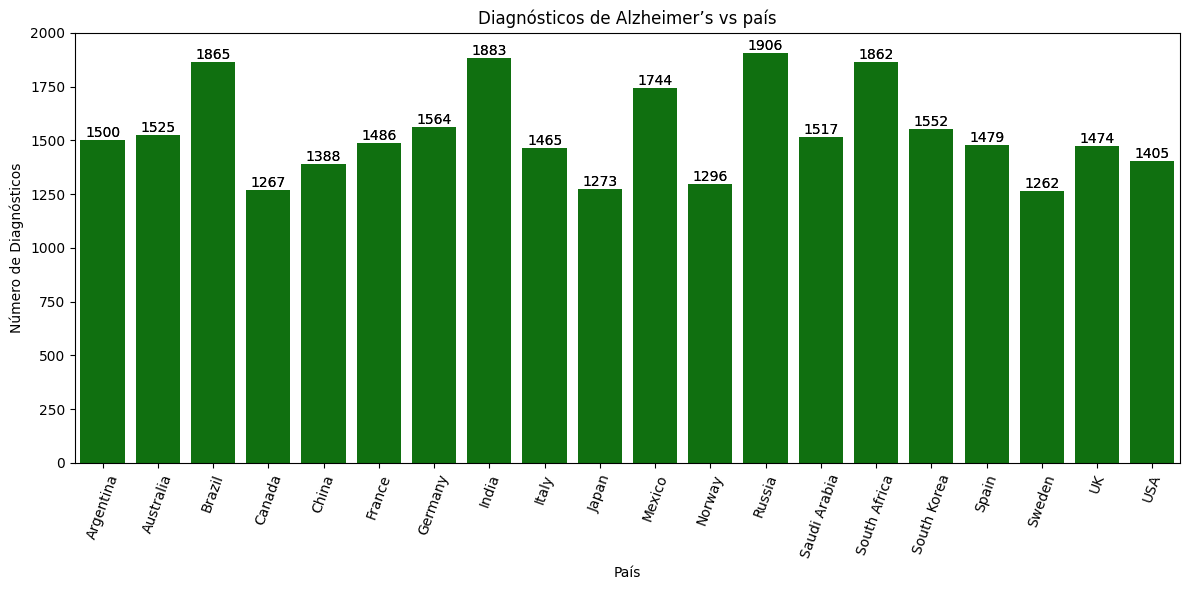

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Pais', y='Diagnosticos Alzheimer Binario', data=diagnosticos_paises)
plt.title('Diagnósticos de Alzheimer’s vs país')
plt.xlabel('País')
plt.ylabel('Número de Diagnósticos')
plt.xticks(rotation=70)  # Rotaciona os rótulos do eixo x em 70 graus

# Define os limites do eixo y de 0 a 2000
plt.ylim(0, 2000)

plt.tight_layout()

# Imprime os dados totais no topo de cada barra.
ax = sns.barplot(x='Pais', y='Diagnosticos Alzheimer Binario', data=diagnosticos_paises, color='green')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.0f}'.format(p.get_height()),
            ha='center', va='bottom')

plt.show()

## Soma dos diagnósticos positivos de Alzheimer

In [ ]:
total = df['Diagnosticos Alzheimer Binario'].sum()
total

30713

## Calculando percentual de diagnósticos de Alzheimer

In [ ]:
diagnosticos_paises_perc = diagnosticos_paises
diagnosticos_paises_perc['percentual'] = (diagnosticos_paises['Diagnosticos Alzheimer Binario'] / total) * 100
diagnosticos_paises_perc

,Pais,Diagnosticos Alzheimer Binario,percentual
0,Argentina,1500,4.883925
1,Australia,1525,4.965324
2,Brazil,1865,6.072347
3,Canada,1267,4.125289
4,China,1388,4.519259
5,France,1486,4.838342
6,Germany,1564,5.092306
7,India,1883,6.130954
8,Italy,1465,4.769967
9,Japan,1273,4.144825


## Gráfico mostrando percentual de diagnósticos de Alzheimer

<ipython-input-35-a4dfacb06a3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pais', y='percentual', data=diagnosticos_paises_perc, palette=palette)


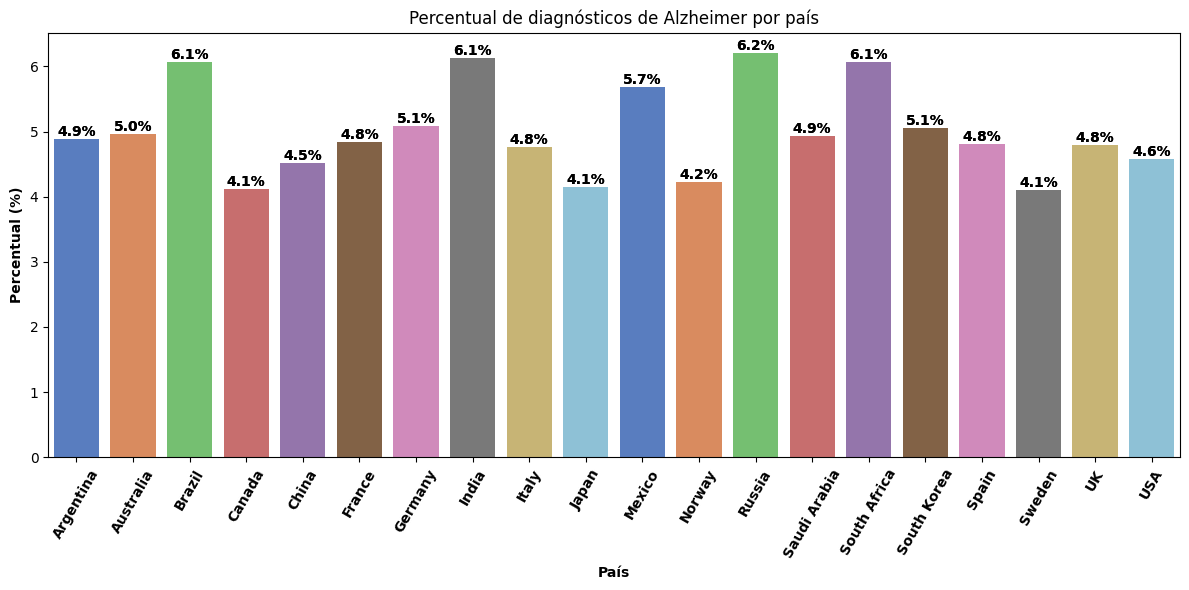

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pais', y='percentual', data=diagnosticos_paises_perc)
plt.title('Percentual de diagnósticos de Alzheimer por país')
plt.xlabel('País', fontweight='bold')
plt.ylabel('Percentual (%)', fontweight='bold')
plt.xticks(rotation=60, fontweight='bold')
plt.tight_layout()

# Cria o gráfico com a paleta de cores
palette = sns.color_palette("muted", len(diagnosticos_paises_perc))

#Para adicionar os valores dos percentuais no topo de cada barra, utilize o seguinte código dentro do bloco do gráfico:
ax = sns.barplot(x='Pais', y='percentual', data=diagnosticos_paises_perc, palette=palette)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()),
            ha='center', va='bottom', fontweight='bold')


plt.show()

## Value_counts - Contando os valores da coluna 'Historico Familiar de Alzheimer'

In [ ]:
historico_familiar = df['Historico Familiar de Alzheimer'].value_counts()
historico_familiar

,count
Historico Familiar de Alzheimer,
No,52004
Yes,22279


# Map - Convertendo dados de variável categórica 'Historico Familiar de Alzheimer'

In [ ]:
df['Historico Familiar Alzheimer'] = df['Historico Familiar de Alzheimer'].map({'Yes': 0, 'No': 1})
df.head()

,Pais,Idade,Gênero,IMC,Nivel Atividade Fisica,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,Historico Familiar de Alzheimer,Depression Level,Dietary Habits,Risco Genetico,Stress Levels,Urban vs Rural Living,Diagnosticos de Alzheimer,Diagnosticos Alzheimer Binario,Historico Familiar Alzheimer
0,Spain,90,Male,33.0,Medium,Never,Occasionally,No,Normal,No,Low,Healthy,No,High,Urban,No,0,1
1,Argentina,72,Male,29.9,Medium,Former,Never,No,Normal,No,Low,Healthy,No,High,Urban,No,0,1
2,South Africa,86,Female,22.9,High,Current,Occasionally,Yes,Normal,No,High,Average,No,High,Rural,No,0,1
3,China,53,Male,31.2,Low,Never,Regularly,No,Normal,No,Medium,Healthy,No,Low,Rural,No,0,1
4,Sweden,58,Female,30.0,High,Former,Never,No,Normal,No,High,Unhealthy,No,High,Rural,No,0,1


## Contagem de dados da coluna 'Historico Familiar de Alzheimer' agrupados pela coluna 'Diagnosticos de Alzheimer'

In [ ]:
# Agrupa os dados pela coluna 'coluna1' e conta os valores da coluna 'coluna2' em cada grupo
contagem = df.groupby('Diagnosticos de Alzheimer')['Historico Familiar de Alzheimer'].value_counts().reset_index(name='contagem')

# Exibe o resultado
contagem.head(400)

,Diagnosticos de Alzheimer,Historico Familiar de Alzheimer,contagem
0,No,No,32864
1,No,Yes,10706
2,Yes,No,19140
3,Yes,Yes,11573


## Contagem de dados da coluna 'Historico Familiar de Alzheimer' agrupados somente pelo resultado positivo "Yes" da coluna 'Diagnosticos de Alzheimer'

In [ ]:
historico_familiar = df.loc[df['Diagnosticos de Alzheimer'] == 'Yes', ['Diagnosticos de Alzheimer', 'Historico Familiar de Alzheimer']].value_counts().reset_index(name='contagem diagnosticos')
historico_familiar = historico_familiar.set_index(['Diagnosticos de Alzheimer', 'Historico Familiar de Alzheimer'])
historico_familiar = historico_familiar.sort_index(level='Historico Familiar de Alzheimer', ascending=False)
historico_familiar.head()

contagem diagnosticos
Diagnosticos de Alzheimer Historico Familiar de Alzheimer                       
Yes                       Yes                                              11573
                          No                                               19140

## Cálculo do percentual de histórico familiar conforme diagnósticos de Alzheimer positivo

In [ ]:
historico_familiar_perc = historico_familiar
historico_familiar_perc['percentual'] = (historico_familiar['contagem diagnosticos'] / total) * 100
historico_familiar_perc.head()

contagem diagnosticos  \
Diagnosticos de Alzheimer Historico Familiar de Alzheimer                          
Yes                       Yes                                              11573   
                          No                                               19140   

                                                           percentual  
Diagnosticos de Alzheimer Historico Familiar de Alzheimer              
Yes                       Yes                               37.681112  
                          No                                62.318888

## Gráfico de barras - Utilizando bibliotecas 'matplotlib.pyplot' e 'seaborn'

## Gráfico mostrando percentual de diagnósticos de Alzheimer considerando o histórico familiar

<ipython-input-29-f4ab2da98158>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Historico Familiar de Alzheimer', y='percentual', data=historico_familiar_perc, palette=colors, width=0.3)


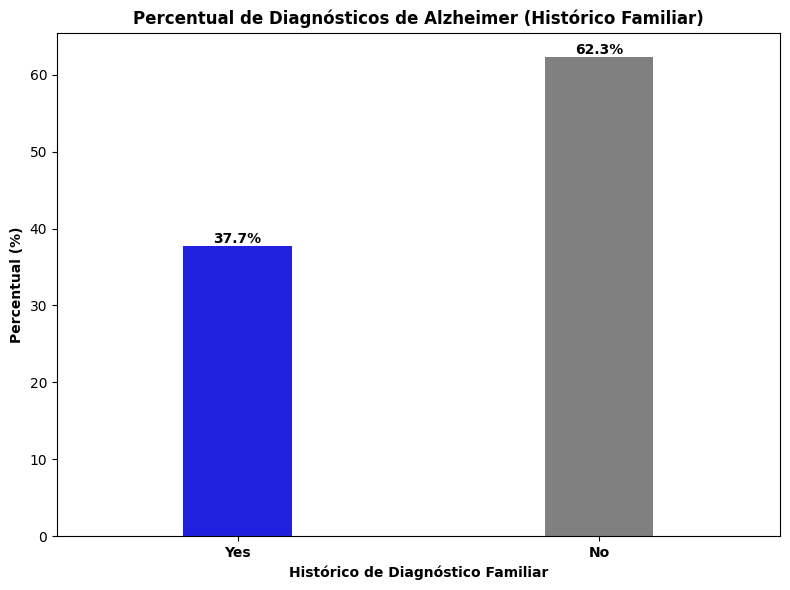

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

historico_familiar_perc = historico_familiar_perc.reset_index()

plt.figure(figsize=(8, 6))   # Ajuste o tamanho da figura, se necessário
# Defina a paleta de cores
colors = ['blue', 'gray']  # Uma cor para cada barra
# Utilize a coluna correspondente ao nível anterior do MultiIndex
sns.barplot(x='Historico Familiar de Alzheimer', y='percentual', data=historico_familiar_perc, palette=colors, width=0.3)
plt.title('Percentual de Diagnósticos de Alzheimer (Histórico Familiar)', fontweight='bold')
plt.xlabel('Histórico de Diagnóstico Familiar', fontweight='bold')   # Deixe o rótulo do eixo x em negrito
plt.ylabel('Percentual (%)', fontweight='bold')   # Deixe o rótulo do eixo y em negrito
plt.xticks(rotation=0, fontweight='bold')  # Deixe as marcas do eixo x em negrito e horizontal
plt.tight_layout()

# Adicione rótulos de porcentagem no topo das barras
ax = plt.gca()  # Obtenha os eixos atuais
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()),
            ha='center', va='bottom', fontweight='bold')

plt.show()

## Contagem de dados da coluna 'Risco Genetico' agrupados pela coluna 'Diagnosticos de Alzheimer'

In [ ]:
# Agrupa os dados pela coluna 'coluna1' e conta os valores da coluna 'coluna2' em cada grupo
contagem_rg = df.groupby('Diagnosticos de Alzheimer')['Risco Genetico'].value_counts().reset_index(name='contagem')

# Exibe o resultado
contagem_rg.head()

,Diagnosticos de Alzheimer,Risco Genetico,contagem
0,No,No,37771
1,No,Yes,5799
2,Yes,No,21790
3,Yes,Yes,8923


## Contagem de dados da coluna 'Risco Genetico' agrupados somente pelo resultado positivo "Yes" da coluna 'Diagnosticos de Alzheimer'

In [ ]:
diagnosticos_rg = df.loc[df['Diagnosticos de Alzheimer'] == 'Yes', ['Diagnosticos de Alzheimer', 'Risco Genetico']].value_counts().reset_index(name='contagem')
diagnosticos_rg = diagnosticos_rg.set_index(['Diagnosticos de Alzheimer', 'Risco Genetico'])
diagnosticos_rg = diagnosticos_rg.sort_index(level='Risco Genetico', ascending=False)
diagnosticos_rg.head()

contagem
Diagnosticos de Alzheimer Risco Genetico          
Yes                       Yes                 8923
                          No                 21790

## Cálculo do percentual de risco genético conforme diagnósticos de Alzheimer positivo

In [ ]:
percentual_rgenetico = diagnosticos_rg
percentual_rgenetico['percentual'] = (diagnosticos_rg['contagem'] / total) * 100
percentual_rgenetico.head()

contagem  percentual
Diagnosticos de Alzheimer Risco Genetico                      
Yes                       Yes                 8923   29.052844
                          No                 21790   70.947156

## Gráfico de barras - Utilizando bibliotecas 'matplotlib.pyplot' e 'seaborn'

## Gráfico mostrando percentual de diagnósticos de Alzheimer considerando o risco genético

<ipython-input-34-6ed5d4501a3a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risco Genetico', y='percentual', data=percentual_rgenetico, palette=colors, width=0.3)


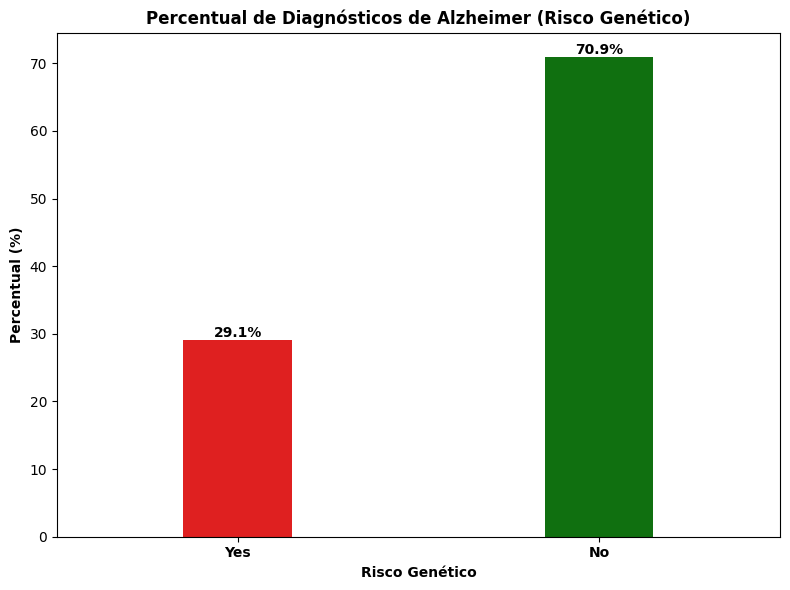

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

percentual_rgenetico = percentual_rgenetico.reset_index()

plt.figure(figsize=(8, 6))  # Ajuste o tamanho da figura, se necessário
# Defina a paleta de cores
colors = ['red', 'green']  # Uma cor para cada barra
# Utilize a coluna correspondente ao nível anterior do MultiIndex
sns.barplot(x='Risco Genetico', y='percentual', data=percentual_rgenetico, palette=colors, width=0.3)
plt.title('Percentual de Diagnósticos de Alzheimer (Risco Genético)', fontweight='bold')
plt.xlabel('Risco Genético', fontweight='bold')  # Deixe o rótulo do eixo x em negrito
plt.ylabel('Percentual (%)', fontweight='bold')  # Deixe o rótulo do eixo y em negrito
plt.xticks(rotation=0, fontweight='bold') # Deixe as marcas do eixo x em negrito e horizontal
plt.tight_layout()

# Adicione rótulos de porcentagem no topo das barras
ax = plt.gca()  # Obtenha os eixos atuais
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.1f}%'.format(p.get_height()),
            ha='center', va='bottom', fontweight='bold')

plt.show()